In [59]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
###
### PROBLEM 2
###

URL = 'http://www.biostatisticien.eu/springeR/nutrition_elderly.xls'
nutri = pd.read_excel(URL,header=None)

display(nutri)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,gender,situation,tea,coffee,height,weight,age,meat,fish,raw_fruit,cooked_fruit_veg,chocol,fat
1,2,1,0,0,151,58,72,4,3,1,4,5,6
2,2,1,1,1,162,60,68,5,2,5,5,1,4
3,2,1,0,4,162,75,78,3,1,5,2,5,4
4,2,1,0,0,154,45,91,0,4,4,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2,1,0,1,160,73,74,4,3,5,5,1,6
223,2,2,0,3,163,62,68,4,3,4,4,1,3
224,1,2,0,2,170,74,71,4,3,4,4,1,3
225,2,1,0,2,154,45,77,4,3,3,5,3,5


In [56]:
nutri.drop([0], inplace=True)

nutri.columns = ["gender", "situation", "tea", "coffee", "height", "weight", "age", "meat", "fish", "raw_fruit", "cooked_fruit_veg", "chocol", "fat"]
nutri = nutri.astype({"tea":int, "coffee":int, "height":float, "weight":float, "age": int}, copy=False, errors='ignore')

In [57]:
gender ={1:"Male", 2:"Female"}
situation = {1:"Single", 2:"Living with spouse", 3:"Living with family", 4:"Living with someone else"}
meat = {0:"Never", 1:"Less than once a week", 2:"Once a week", 3:"2-3 times a week", 4:"4-6 times a week", 5:"Every day"}
fish = {0:"Never", 1:"Less than once a week", 2:"Once a week", 3:"2-3 times a week", 4:"4-6 times a week", 5:"Every day"}
raw_fruit = {0:"Never", 1:"Less than once a week", 2:"Once a week", 3:"2-3 times a week", 4:"4-6 times a week", 5:"Every day"}
cooked_fruit_veg = {0:"Never", 1:"Less than once a week", 2:"Once a week", 3:"2-3 times a week", 4:"4-6 times a week", 5:"Every day"}
chocol = {0:"Never", 1:"Less than once a week", 2:"Once a week", 3:"2-3 times a week", 4:"4-6 times a week", 5:"Every day"}
fat = {1:"Butter", 2:"Margarine", 3:"Peanut Oil", 4:"Sunflower oil", 5:"Olive oil", 6:"Mix of vegetable oils (e.g., Isio4)", 7:"Colza oil", 8:"Duck or goose fat"}
 
nutri.gender.replace(gender, inplace=True)
nutri.situation.replace(situation, inplace=True)
nutri.meat.replace(meat, inplace=True)
nutri.fish.replace(fish, inplace=True)
nutri.raw_fruit.replace(raw_fruit, inplace=True)
nutri.cooked_fruit_veg.replace(cooked_fruit_veg, inplace=True)
nutri.chocol.replace(chocol, inplace=True)
nutri.fat.replace(fat, inplace=True)

In [58]:
display(nutri)
nutri.to_csv("nutri.csv", index=None,header=True)

,gender,situation,tea,coffee,height,weight,age,meat,fish,raw_fruit,cooked_fruit_veg,chocol,fat
1,Female,Single,0,0,151.0,58.0,72,4-6 times a week,2-3 times a week,Less than once a week,4-6 times a week,Every day,"Mix of vegetable oils (e.g., Isio4)"
2,Female,Single,1,1,162.0,60.0,68,Every day,Once a week,Every day,Every day,Less than once a week,Sunflower oil
3,Female,Single,0,4,162.0,75.0,78,2-3 times a week,Less than once a week,Every day,Once a week,Every day,Sunflower oil
4,Female,Single,0,0,154.0,45.0,91,Never,4-6 times a week,4-6 times a week,Never,2-3 times a week,Margarine
5,Female,Single,2,1,154.0,50.0,65,Every day,2-3 times a week,Every day,Every day,2-3 times a week,Margarine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Female,Single,0,1,160.0,73.0,74,4-6 times a week,2-3 times a week,Every day,Every day,Less than once a week,"Mix of vegetable oils (e.g., Isio4)"
223,Female,Living with spouse,0,3,163.0,62.0,68,4-6 times a week,2-3 times a week,4-6 times a week,4-6 times a week,Less than once a week,Peanut Oil
224,Male,Living with spouse,0,2,170.0,74.0,71,4-6 times a week,2-3 times a week,4-6 times a week,4-6 times a week,Less than once a week,Peanut Oil
225,Female,Single,0,2,154.0,45.0,77,4-6 times a week,2-3 times a week,2-3 times a week,Every day,2-3 times a week,Olive oil


<AxesSubplot:>

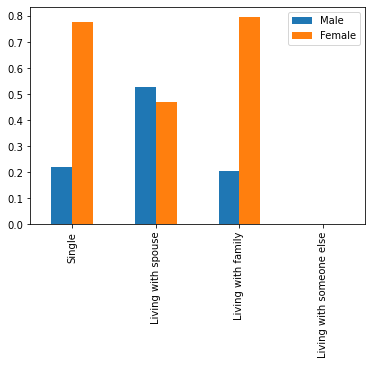

In [124]:
###
### PROBLEM 4
###

# nutri dataframe already imported
plot_data = nutri.groupby(["situation", "gender"]).size()

male = [plot_data[a] for a in range(1, len(plot_data), 2)] + [0]
female = [plot_data[a] for a in range(0, len(plot_data), 2)] + [0]

for a in range(len(male)):
    total = male[a] + female[a]
    if total != 0:
        male[a] = male[a] / total
        female[a] = female[a] / total
        
plot_data = pd.DataFrame({"Male": male , "Female": female}, index=situation.values())
#plot_data = plot_data.to_frame()
#plot_data.info()

plot_data.plot.bar()

In [127]:
###
### PROBLEM 6
###

URL = 'http://vincentarelbundock.github.io/Rdatasets/csv/datasets/EuStockMarkets.csv'
EuStockMarkets = pd.read_csv(URL,header=None)

EuStockMarkets.columns = ["", "DAX", "SMI", "CAC", "FTSE"]
EuStockMarkets.drop([0], inplace=True)

display(EuStockMarkets)

,,DAX,SMI,CAC,FTSE
1,1.0,1628.75,1678.1,1772.8,2443.6
2,2.0,1613.63,1688.5,1750.5,2460.2
3,3.0,1606.51,1678.6,1718,2448.2
4,4.0,1621.04,1684.1,1708.1,2470.4
5,5.0,1618.16,1686.6,1723.1,2484.7
...,...,...,...,...,...
1856,1856.0,5460.43,7721.3,3939.5,5587.6
1857,1857.0,5285.78,7447.9,3846,5432.8
1858,1858.0,5386.94,7607.5,3945.7,5462.2
1859,1859.0,5355.03,7552.6,3951.7,5399.5


In [142]:
time_vector = tuple(float(round(1991.496 + ((1/260) * a), 3)) for a in range(EuStockMarkets.shape[0]))
print(time_vector)

(1991.496, 1991.5, 1991.504, 1991.508, 1991.511, 1991.515, 1991.519, 1991.523, 1991.527, 1991.531, 1991.534, 1991.538, 1991.542, 1991.546, 1991.55, 1991.554, 1991.558, 1991.561, 1991.565, 1991.569, 1991.573, 1991.577, 1991.581, 1991.584, 1991.588, 1991.592, 1991.596, 1991.6, 1991.604, 1991.608, 1991.611, 1991.615, 1991.619, 1991.623, 1991.627, 1991.631, 1991.634, 1991.638, 1991.642, 1991.646, 1991.65, 1991.654, 1991.658, 1991.661, 1991.665, 1991.669, 1991.673, 1991.677, 1991.681, 1991.684, 1991.688, 1991.692, 1991.696, 1991.7, 1991.704, 1991.708, 1991.711, 1991.715, 1991.719, 1991.723, 1991.727, 1991.731, 1991.734, 1991.738, 1991.742, 1991.746, 1991.75, 1991.754, 1991.758, 1991.761, 1991.765, 1991.769, 1991.773, 1991.777, 1991.781, 1991.784, 1991.788, 1991.792, 1991.796, 1991.8, 1991.804, 1991.808, 1991.811, 1991.815, 1991.819, 1991.823, 1991.827, 1991.831, 1991.834, 1991.838, 1991.842, 1991.846, 1991.85, 1991.854, 1991.858, 1991.861, 1991.865, 1991.869, 1991.873, 1991.877, 1991.881, 1

<AxesSubplot:>

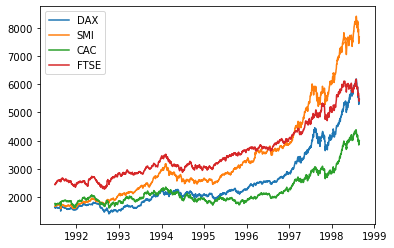

In [145]:
plot_data = pd.DataFrame({'DAX':list(float(a) for a in EuStockMarkets.DAX), 'SMI':list(float(a) for a in EuStockMarkets.SMI), 'CAC':list(float(a) for a in EuStockMarkets.CAC), 'FTSE':list(float(a) for a in EuStockMarkets.FTSE)}, index=time_vector)
plot_data.plot.line()

In [162]:
###
### PROBLEM 8
###

URL = 'http://vincentarelbundock.github.io/Rdatasets/csv/datasets/Orange.csv'
orange = pd.read_csv(URL,header=None)

orange.drop([0], axis=1, inplace = True)

orange.columns = ["Tree", "age", "circumference"]
orange.drop([0], inplace=True)

orange

,Tree,age,circumference
1,1,118,30
2,1,484,58
3,1,664,87
4,1,1004,115
5,1,1231,120
6,1,1372,142
7,1,1582,145
8,2,118,33
9,2,484,69
10,2,664,111


In [156]:
## Features are named 'Tree', 'age', and 'circumference'

In [ ]:
import seaborn as sns

plot_data = pd.DataFrame({"circumference" : list(orange.circumference), "age" : list(orange.age)}, index = list(orange.Tree))
display(plot_data)

sns.FacetGrid(plot_data, col = "age", row="circumference")
#sns.regplot(data=plot_data)

,circumference,age
1,30,118
1,58,484
1,87,664
1,115,1004
1,120,1231
1,142,1372
1,145,1582
2,33,118
2,69,484
2,111,664
